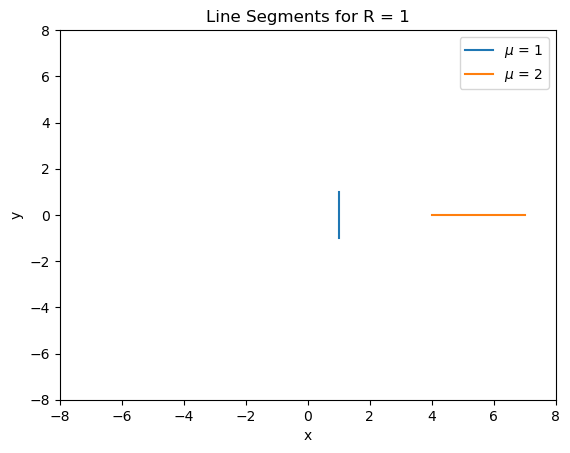

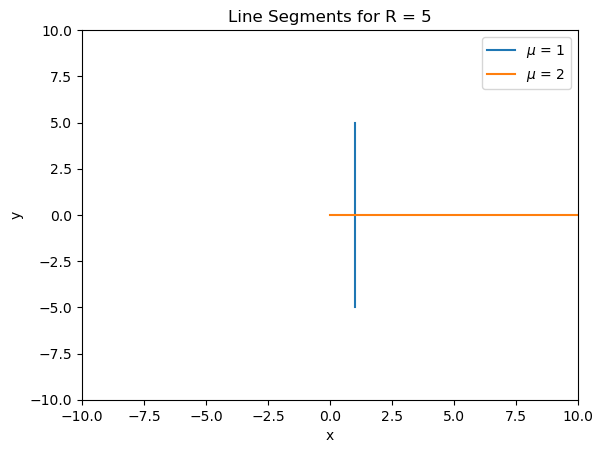

In [1]:
import matplotlib.pyplot as plt

# mu_1 =  
plt.plot([1, 1], [-1, 1], label='$\mu$ = 1')  
plt.plot([4, 7], [0, 0], label='$\mu$ = 2')   

plt.xlim(-8, 8)
plt.xlabel('x')
plt.ylim(-8, 8)
plt.ylabel('y')
plt.legend()
plt.title('Line Segments for R = 1')
plt.show()



plt.plot([1, 1], [-5, 5], label='$\mu$ = 1')  
plt.plot([0, 10], [0, 0], label='$\mu$ = 2')   

plt.xlim(-10, 10)
plt.xlabel('x')
plt.ylim(-10, 10)
plt.ylabel('y')
plt.legend()
plt.title('Line Segments for R = 5')
plt.show()







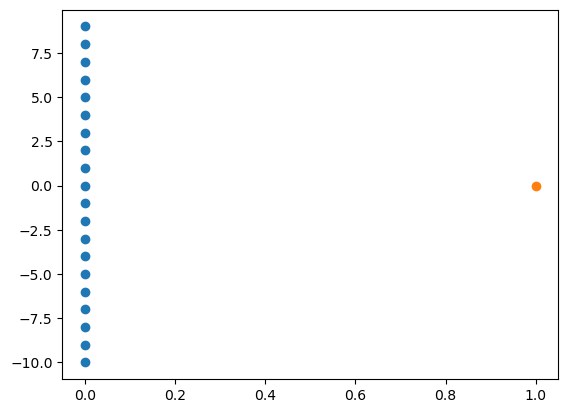

In [47]:
import numpy as np

x = np.array([1,0])

w1s = np.arange(-10,10)
w2s = np.arange(-10,10)
w_final = []

for w1 in w1s:
    for w2 in w2s:
        warray = np.array([w1,w2])
        if np.dot(warray, x) == 0:
            w_final.append(warray)

w_final = np.array(w_final)
plt.scatter(w_final[:,0], w_final[:,1])
plt.scatter(x[0], x[1])
